# Frequency analysis of the intra-cavity field in a probe-control configuration

## Hamiltonian
$$
\begin{equation}
\boxed{\hat{H} = \hbar\Delta\hat{a}^\dagger\hat{a} +\hbar\omega_m\hat{b}^\dagger\hat{b}  - \hbar g_0\hat{a}^\dagger\hat{a}\left(\hat{b}^\dagger + \hat{b}\right) + i\hbar\varepsilon_l\left(a^\dagger  -\hat{a}\right) + i\hbar\varepsilon_p\left(a^\dagger e^{-i(\omega_p - \omega_l) t} -\hat{a}e^{i(\omega_p - \omega_l) t}\right)}
\end{equation}
$$

where,

$$
\begin{equation}
\Delta = \omega_0 - \omega_l
\end{equation}
$$

## Heisenberg's equations of motion

$$
\partial_t\hat{x} = \frac{i}{\hbar}[\hat{H}, \hat{x}]
$$

Using relations, $[\hat{a}^\dagger\hat{a}, \hat{a}] = -\hat{a}$, $[\hat{a}^\dagger, \hat{a}] = 1$ and $[\hat{x}^\dagger\hat{x}, 
\hat{y}] =0$ and putting the decay terms we get, the equations of motion for the expectation value of the operators as:


$$
\begin{align}
\frac{d<\hat{a}>}{dt} &= -\left(\frac{\kappa}{2} + i\Delta\right)<\hat{a}> + ig_0\hat{a}\left(<\hat{b}^\dagger> + <\hat{b}>\right) -\varepsilon_l -\varepsilon_p e^{-i(\omega_p - \omega_l) t}\\
%
\frac{d<\hat{b}>}{dt} &= -\left(\frac{\gamma_m}{2} + i\omega_m\right)<\hat{b}> + i g_0<\hat{a}^\dagger\hat{a}>
\end{align}
$$



# Libraries

In [307]:
import numpy as np
from scipy.integrate import solve_ivp
import scipy.constants as sc

# Constants

In [308]:
iota = complex(0,1)
pi = sc.pi
hbar = sc.hbar
speed_of_light = sc.c

# Parameters

## Decay rates
$\kappa = 2\pi\times1.5$ MHz, $\gamma_m =2\pi\times41$ KHz, 

## Frequencies
$\omega_m = 2\pi\times51.8$ MHz, $\Delta = \omega_0 - \omega_l = \omega_m$, $\omega_p = \omega_0$, $\omega_l = \omega_0 - \omega_m$

## Other parameters
$\lambda_l = 775$ nm, drive power, $\mathcal{P}_l = 1$ mW, $g_0 = 2\pi\times 1.55$ KHz


In [309]:
# Decay rates
gamma_m_0 = 2*pi*41e3
kappa_0 = 2*pi*1.5e6

# Frequencies
lambda_l = 775e-9
omega_l_0 = 2*pi*speed_of_light/lambda_l
omega_m_0 = 2*pi*51.8e6

# Optomechanical coupling constant
g_0_0 = 2*pi*1.55e3

# detuning
delta_0    = omega_m_0

# Field powers
power_l = 1e-3     # power of control/drive (1 milli watts)
power_p = 1e-5     # power of probe/signal (1 milli watts)

# field amplitudes
epsilon_l_0 = np.sqrt(2*kappa_0*power_l/(hbar*omega_l_0))
epsilon_p_0 = np.sqrt(2*kappa_0*power_p/(hbar*omega_p_0))

# Parameters normalized w.r.t $\kappa$

In [310]:
# field amplitudes
E_0_c = epsilon_l_0/kappa_0
E_0_p = epsilon_p_0/kappa_0

# Optomechanical coupling constant
g_0 = g_0_0/kappa_0

# decay rates
kappa = 1
gamma_m = gamma_m_0/kappa_0

# frequencies
omega_m = omega_m_0/kappa_0
omega_l = omega_l_0/kappa_0
omega_p = omega_0               # probe frequency

# detuning
delta    = omega_m

# cavity resonance frequency
omega_0  = omega_l + delta     # cavity resonance frequency

# Define the functions

In [311]:

# Define the coupled differential equations
def equations(t, y):
    dydt = np.zeros(3, dtype=np.complex128)
    
    dydt[0] = -(kappa + iota*delta)*y[0] + iota*g_0*(y[1] + y[2]) - (epsilon_l_0/kappa_0) - E_0_p*np.exp(-iota*(omega_p - omega_l)*t)
    dydt[1] = -(gamma_m + iota*omega_m)*y[1] + iota*g_0*np.abs(y[0])
    dydt[2] = -(gamma_m - iota*omega_m)*np.conj(y[1]) - iota*g_0*np.abs(y[0])

    return dydt

# Initial condition and solving the equations

In [312]:
# Initial conditions
y0 = [complex(0,0),complex(0,0),complex(0,0)]       # Initial values for y1 and y2
t_span = (0, 20)                                    # Time span for the solution

# Solve the differential equations
sol = solve_ivp(equations, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 2000))

# Fourier Transform of $<\hat{a}(t)> = \alpha(t)$ and $<\hat{b}(t)> = \beta(t)$

In [313]:
# Calculate the Fourier transform
fft_alpha = np.fft.fft(sol.y[0])
fft_beta = np.fft.fft(sol.y[1])

# define a time vector
t = np.linspace(t_span[0], t_span[1], 2000)
# Calculate the frequencies corresponding to the Fourier transform

freqs = np.fft.fftfreq(len(t), t[1] - t[0])


# Plots

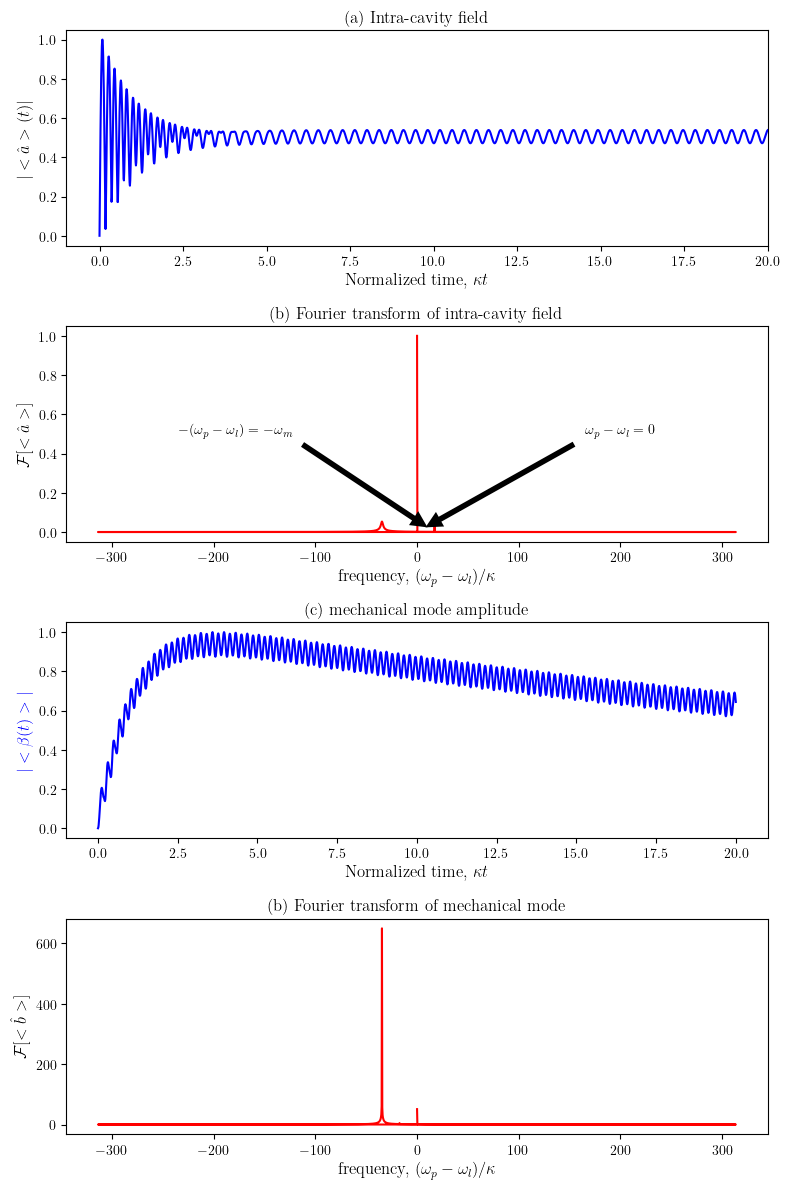

In [314]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# enable TeX fonts
plt.rcParams['text.usetex'] = True

# Set the global font size for all legends
mpl.rcParams['legend.fontsize'] = 12

# Set the global font size for all axis labels
mpl.rcParams['axes.labelsize'] = 12

# Set the global font style for all axis labels
plt.rcParams['font.family'] = 'Times New Roman'


# Create a figure and axis for the subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

# Data to be plotted
y1 = np.abs(sol.y[0])/np.max(np.abs(sol.y[0]))
y2 = np.abs(sol.y[1])/np.max(np.abs(sol.y[1]))

# Plot the first subplot (top plot)
axs[0].plot(t, y1, label=r'$|<\hat{a}>(t)|$', color='blue')
axs[0].set_title('(a) Intra-cavity field')
axs[0].set_xlabel(r'Normalized time, $\kappa t$')
axs[0].set_ylabel(r'$|<\hat{a}>(t)|$')
axs[0].set_xlim([-1, 20])
#axs[0].legend()

# Plot the second subplot

# Annotate the point with an arrow
axs[1].annotate(r'$-(\omega_p - \omega_l) = -\omega_m$', xy=(-(omega_p - omega_l), 0), xytext=(x_point - 200, y_point + 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05, linewidth=0.001))

axs[1].annotate(r'$\omega_p - \omega_l = 0$', xy=(0, 0), xytext=(x_point + 200, y_point + 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05, linewidth=0.001))

axs[1].plot(2*np.pi*freqs, np.abs(fft_alpha)/np.max(np.abs(fft_alpha)), label=r'$|\mathcal{F}[<\hat{a}>]|$', color='red')
axs[1].set_title('(b) Fourier transform of intra-cavity field')
axs[1].set_xlabel(r'frequency, $(\omega_p - \omega_l)/\kappa$')
axs[1].set_ylabel(r'$\mathcal{F}[<\hat{a}>]$')
#axs[1].legend()

# plot the third subplot
axs[2].plot(t, y2, 'b-')
axs[2].set_title('(c) mechanical mode amplitude')
axs[2].set_xlabel(r'Normalized time, $\kappa t$')
axs[2].set_ylabel(r'$|<\beta(t)>|$', color='b', fontsize = 12)

# Plot the fourth subplot (bottom plot)
axs[3].plot(2*np.pi*freqs, np.abs(fft_beta), label=r'$|\mathcal{F}[<\hat{b}>]|$', color='red')
axs[3].set_title('(b) Fourier transform of mechanical mode')
axs[3].set_xlabel(r'frequency, $(\omega_p - \omega_l)/\kappa$')
axs[3].set_ylabel(r'$\mathcal{F}[<\hat{b}>]$')

# Adjust the layout to prevent overlap
plt.tight_layout()

# save the plot to a file
plt.savefig('figure10.png', dpi=300)

# Show the plots
plt.show()
